In [2]:
options(warn = -1)
options(repr.plot.width = 15, repr.plot.height = 9)
# 맥에서는 실행해야 한글이 보임
Sys.setlocale(category = 'LC_ALL',locale = 'ko_KR.UTF-8')

[1] "ko_KR.UTF-8/ko_KR.UTF-8/ko_KR.UTF-8/C/ko_KR.UTF-8/C"

In [3]:
# election에 데이터 불러오기
# 선거인수(선거해야할 사람 수), 투표수(투표한 사람의 수)
election <- read.csv("../Data/election_2022.csv")
head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115
2,서울특별시,중구,111448,84998,38244,42906,2310
3,서울특별시,용산구,199077,152068,60063,85047,4374
4,서울특별시,성동구,252087,197240,84411,103880,5365
5,서울특별시,광진구,303582,235471,109922,113733,7072
6,서울특별시,동대문구,300928,232106,108171,112890,6416


In [4]:
tail(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
243,경상남도,함양군,34459,26955,8526,16957,528
244,경상남도,산청군,31645,24913,7125,16607,464
245,경상남도,거창군,53049,41399,11963,27254,895
246,경상남도,합천군,39768,31270,6911,22742,511
247,제주특별자치도,제주시,408552,296826,157695,122084,10007
248,제주특별자치도,서귀포시,155802,112823,55435,50930,3591


In [5]:
str(election)

'data.frame':	248 obs. of  7 variables:
 $ 광역시도: chr  "서울특별시" "서울특별시" "서울특별시" "서울특별시" ...
 $ 시군구  : chr  "종로구" "중구" "용산구" "성동구" ...
 $ 선거인수: int  129968 111448 199077 252087 303582 300928 347108 375880 268974 281812 ...
 $ 투표수  : int  100629 84998 152068 197240 235471 232106 260862 292187 199448 216036 ...
 $ 이재명  : int  46130 38244 60063 84411 109922 108171 130381 142702 103333 106546 ...
 $ 윤석열  : int  49172 42906 85047 103880 113733 112890 118201 135044 86540 99780 ...
 $ 심상정  : int  3115 2310 4374 5365 7072 6416 6899 8952 5245 5605 ...


In [6]:
sum(is.na(election))

[1] 0

In [7]:
# 중복된 시군구의 갯수?
length(election$`시군구`) - length(unique(election$`시군구`))

[1] 22

In [8]:
# 3명의 후보의 투표 합 구하기
election$electionSum <- apply(election[,5:7], 1, sum)

head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417
2,서울특별시,중구,111448,84998,38244,42906,2310,83460
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477


In [9]:
# 3명의 후보가 받은표가 투표수의 몇 퍼센트인지
election$electionRatio <- election[,c("electionSum")] / election[,c("투표수")] * 100

head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [10]:
library(dplyr)


다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
# electionRatio가 가장 높은 지역과 가장 낮은 지역 구하기
## 정렬
cat("가장 높은 지역 :", arrange(election, desc(electionRatio))[1,]$광역시도, 
arrange(election, desc(electionRatio))[1,]$시군구, "\n")

cat("가장 낮은 지역 :", arrange(election, desc(electionRatio))[nrow(election),]$광역시도, 
arrange(election, desc(electionRatio))[nrow(election),]$시군구)

## subset
subset(election, electionRatio == max(electionRatio) | electionRatio == min(electionRatio))
# subset(election, electionRatio == min(electionRatio))

가장 높은 지역 : 경기도 성남시분당구 
가장 낮은 지역 : 인천광역시 옹진군

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
59,인천광역시,옹진군,18659,14912,5218,8797,304,14319,96.02334
82,경기도,성남시분당구,404493,335434,140966,183094,7005,331065,98.69751


---
### 광역시별 투표율을 3D Pie Chart로 표현하기

In [12]:
library(plotrix)

In [13]:
# 1) 광역시별 합계
sumPieChart <- aggregate(투표수 ~ 광역시도, election, sum)
# 2) 광역시별 합계를 높은 순으로 정렬(내림차순)
sumPieChart <- arrange(sumPieChart, desc(투표수))

class(sumPieChart$`투표수`)

[1] "integer"

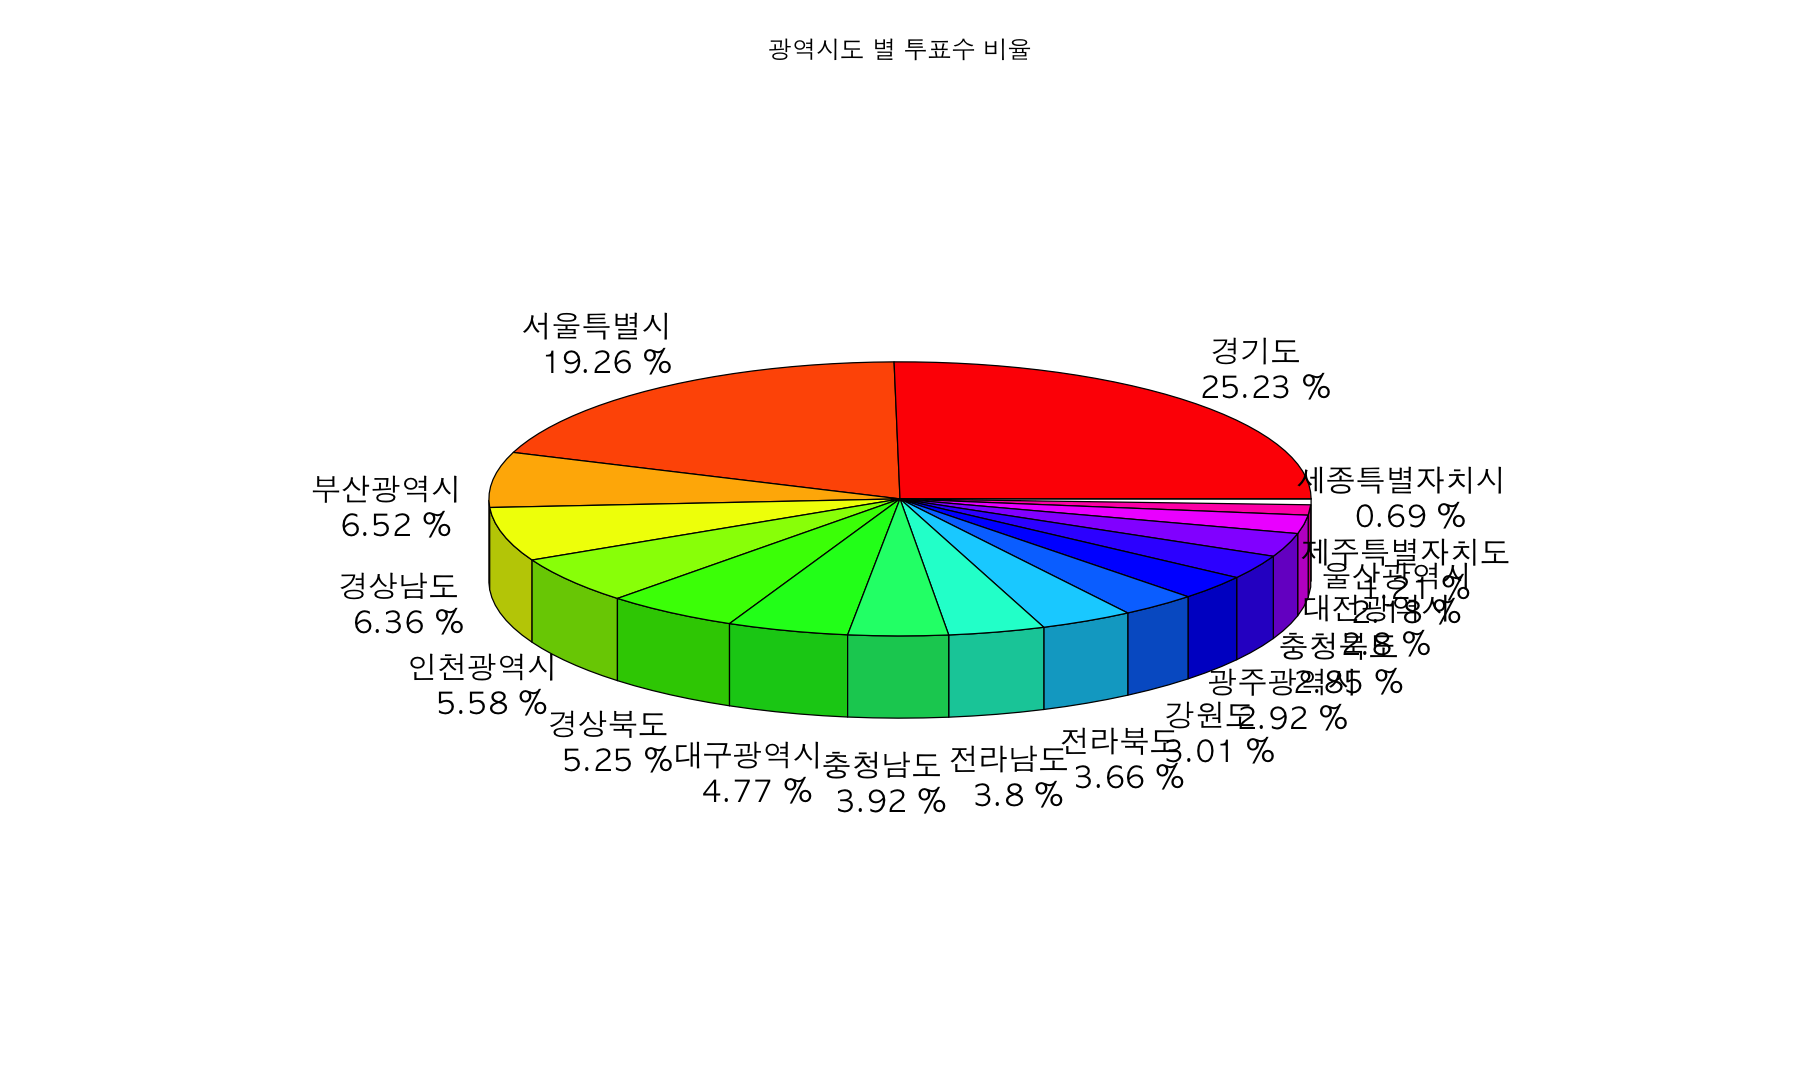

In [14]:
par(bg = "white", family = "AppleGothic")

# sumPieChart$`투표수` / sum(sumPieChart$`투표수`) * 100

label <- paste(
    sumPieChart$`광역시도`, "\n",
    round(sumPieChart$`투표수` / sum(sumPieChart$`투표수`) * 100, 2), "%"
)

pie3D(
    sumPieChart$`투표수`,
    labels = label,
    main = "광역시도 별 투표수 비율"
)


### 윤석열 후보의 광역시도별 득표율을 3D Pie Chart로 표현하기
- 단 ratio가 3%이상만 보이기

In [69]:
# head(election)
# 윤석열 후보의 광역시별 총합 구하기
# aggregate(윤석열 ~ 광역시도, election, sum)

# 정렬 내림차순
elec_yoon_ratio_desc <- arrange(aggregate(윤석열 ~ 광역시도, election, sum), desc(윤석열))

# %(ratio) 구하기 -> 광역시도 별 윤석열 / 윤석열 총합
round(elec_yoon_ratio_desc$윤석열 / sum(elec_yoon_ratio_desc$윤석열) * 100, 1)

# 라벨 만들기
label <- ifelse(round(elec_yoon_ratio_desc$윤석열 /
    sum(elec_yoon_ratio_desc$윤석열) * 100, 1) >= 3,
    paste(round(elec_yoon_ratio_desc$윤석열 / sum(elec_yoon_ratio_desc$윤석열) * 100, 1)
    , "%"), ""
)

label <- paste(elec_yoon_ratio_desc$`광역시도`, "\n", label)

# 차트
elec_yoon_ratio <- round(elec_yoon_ratio_desc$윤석열 / sum(elec_yoon_ratio_desc$윤석열) * 100, 1)

# elec_yoon_label <-


[1] 23.7 20.0  7.9  7.8  7.6  7.4  5.4  4.1  3.4  3.0  2.9  2.4  1.1  1.1  0.9
[16]  0.8  0.6

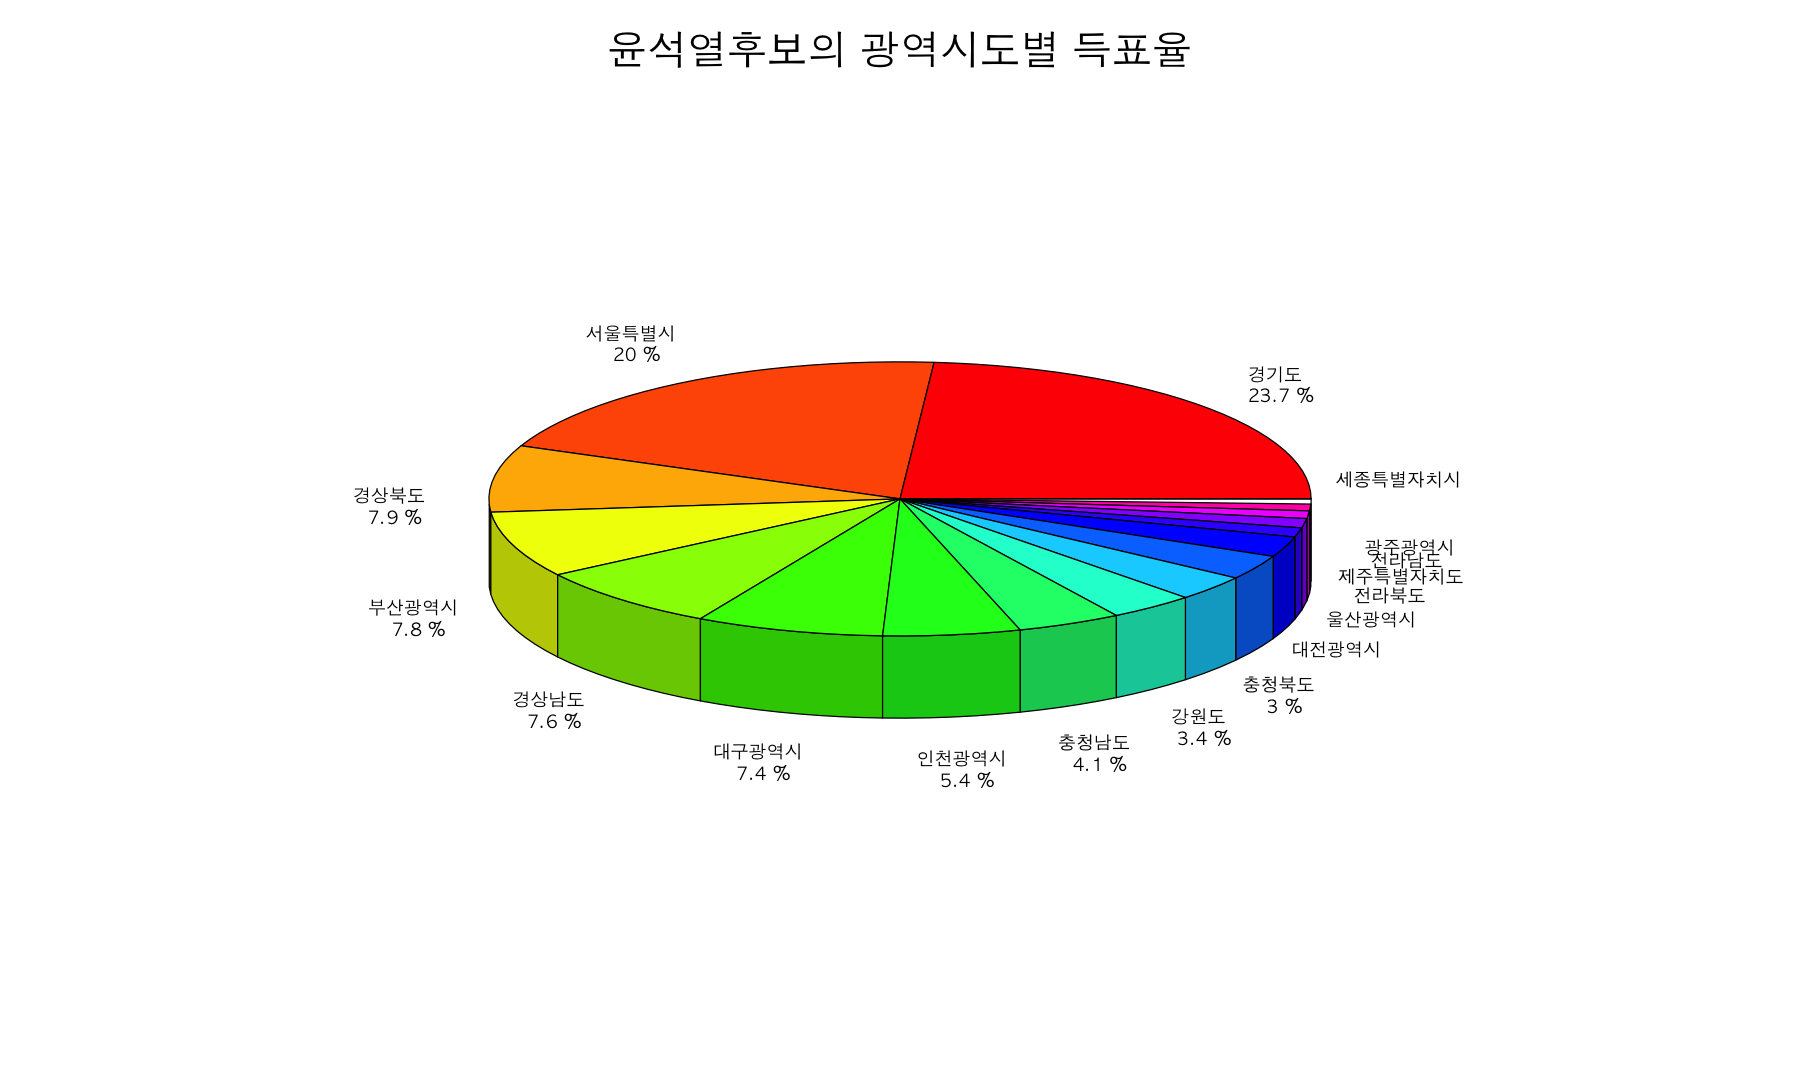

In [68]:
par(bg = "white", family = "AppleGothic")

pie3D(
    round(ratio_yun$윤석열 / sum(ratio_yun$윤석열) * 100, 1),
    labels = label,
    main = "윤석열후보의 광역시도별 득표율",
    cex.main = 2,
    labelcex = .9
)

### 각 후보 별 광역시도 득표율

In [84]:
elec_sim_desc <- arrange(aggregate(심상정 ~ 광역시도, election, sum), desc(심상정))
elec_sim_desc

elec_sim_ratio <- round(elec_sim_desc$심상정 / sum(elec_sim_desc$심상정) * 100, 1)

elec_sim_label <- paste(elec_sim_desc$`광역시도`, "\n", ifelse(elec_sim_ratio >= 3, paste(elec_sim_ratio, "%"), ""))

elec_sim_label

광역시도,심상정
<chr>,<int>
경기도,201113
서울특별시,180324
경상남도,52591
인천광역시,51852
부산광역시,47541
경상북도,33123
충청남도,31789
대구광역시,31131
대전광역시,25445


[1] "경기도 \n 25.2 %"     "서울특별시 \n 22.6 %" "경상남도 \n 6.6 %"   
 [4] "인천광역시 \n 6.5 %"  "부산광역시 \n 6 %"    "경상북도 \n 4.2 %"   
 [7] "충청남도 \n 4 %"      "대구광역시 \n 3.9 %"  "대전광역시 \n 3.2 %" 
[10] "충청북도 \n 3.2 %"    "강원도 \n 3.1 %"      "울산광역시 \n "      
[13] "전라북도 \n "         "전라남도 \n "         "광주광역시 \n "      
[16] "제주특별자치도 \n "   "세종특별자치시 \n "

### 윤석열 후보의 서울 득표 Top5의 득표율을 무시하고 나머지 지역은 기타로 합쳐서 득표율 표시하기

[1] 7.84 7.25 5.58 5.51 5.02 4.93 4.67 4.60 4.32 4.17 4.15 4.14 3.90 3.82 3.63
[16] 3.49 3.47 3.19 3.06 3.04 2.66 2.61 2.13 1.51 1.32

[1]  7.84  7.25  5.58  5.51  5.02 68.81

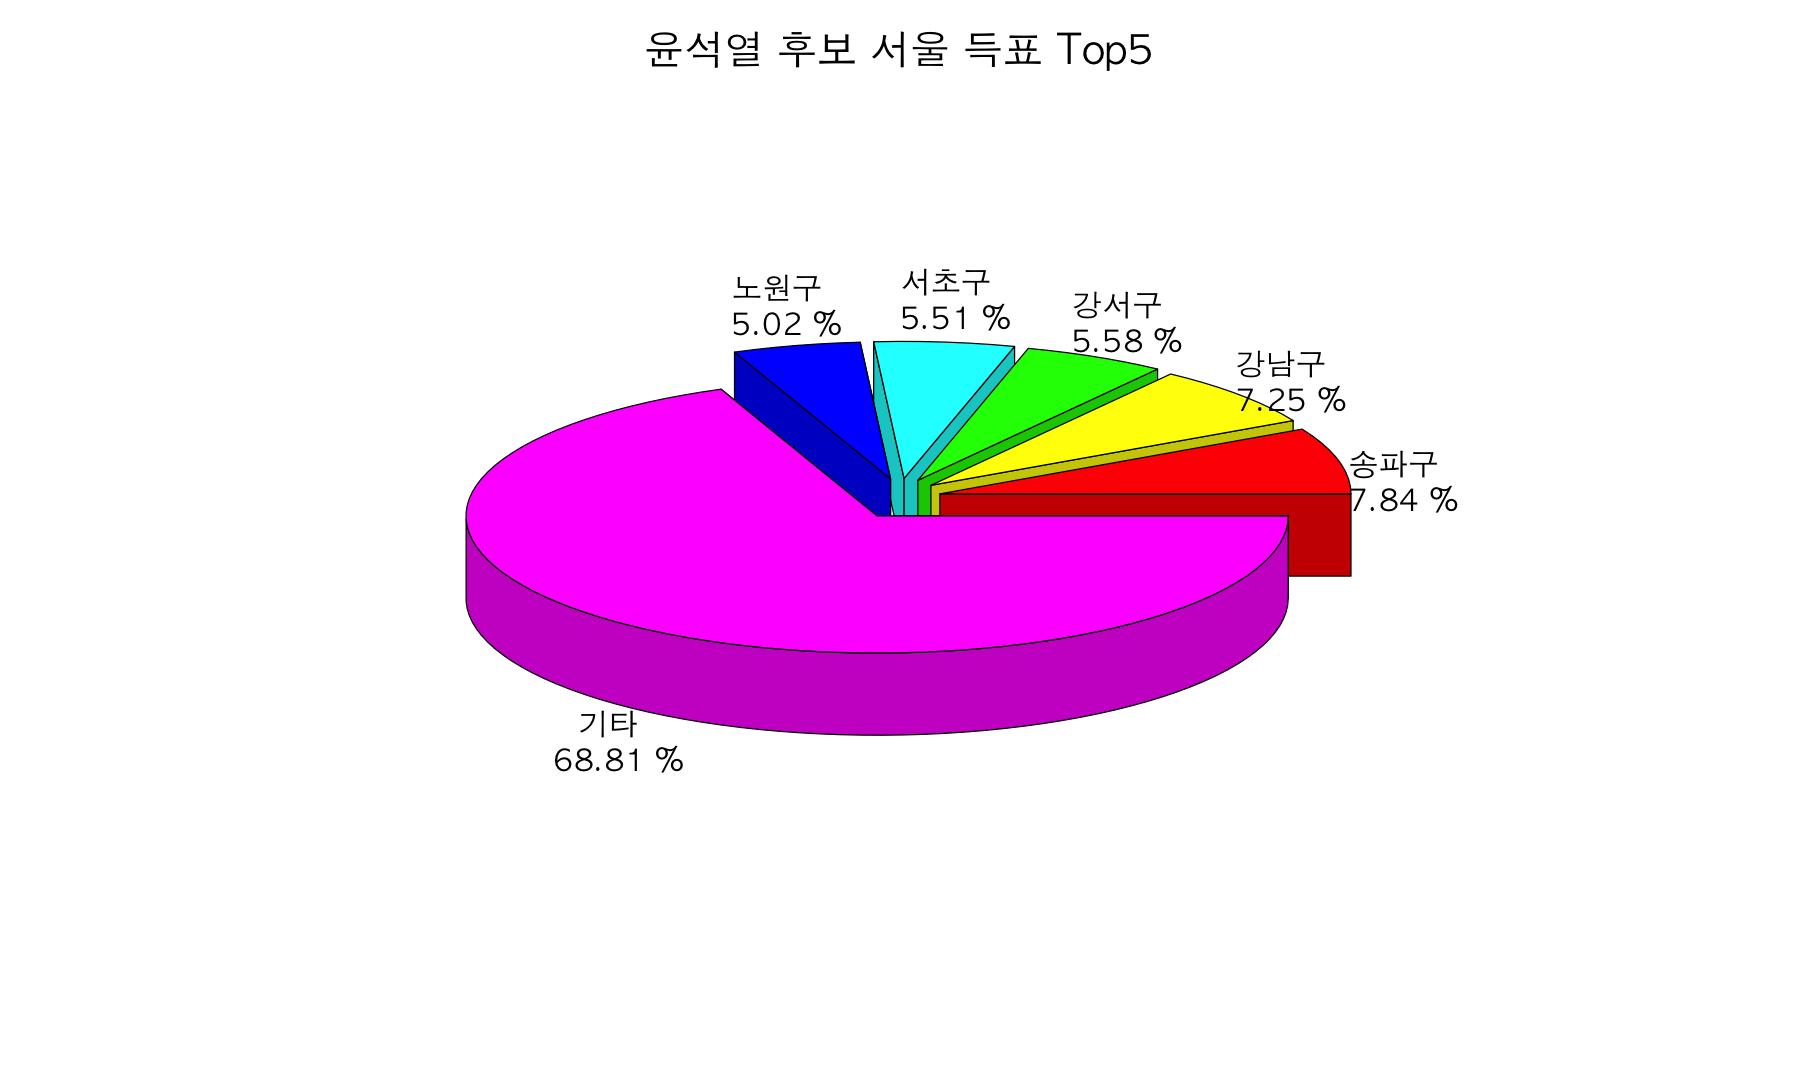

In [115]:
# 서울 특별시만 남기기 # 내림차순 정렬
elec_seoul <- arrange(subset(election, 광역시도 == "서울특별시")[,c(2,6)], desc(윤석열))

# ratio 계산
elec_seoul_yoon_ratio <- round(elec_seoul$`윤석열` / sum(elec_seoul$`윤석열`) * 100, 2)

# top5를 제외하고 sum
elec_seoul_yoon_ratio <- c(elec_seoul_yoon_ratio[1:5], sum(elec_seoul_yoon_ratio[6:length(elec_seoul_yoon_ratio)]))

# 시군구 이름 정리
elec_seoul_name <- c(elec_seoul$`시군구`[1:5], "기타")
elec_seoul_label <- paste(elec_seoul_name, "\n", elec_seoul_yoon_ratio, "%")


par(bg = "white", family = "AppleGothic")
pie3D(
    elec_seoul_yoon_ratio,
    labels = elec_seoul_label,
    explode = .1,
    main = "윤석열 후보 서울 득표 Top5",
    cex.main = 2,
    
)

[1] 6.24 6.16 5.91 5.56 5.39 5.16 4.96 4.45 4.36 4.34 4.23 4.18 3.92 3.89 3.83
[16] 3.82 3.56 3.25 3.11 2.98 2.91 2.43 2.37 1.73 1.28

[1]  6.24  6.16  5.91  5.56  5.39 70.76

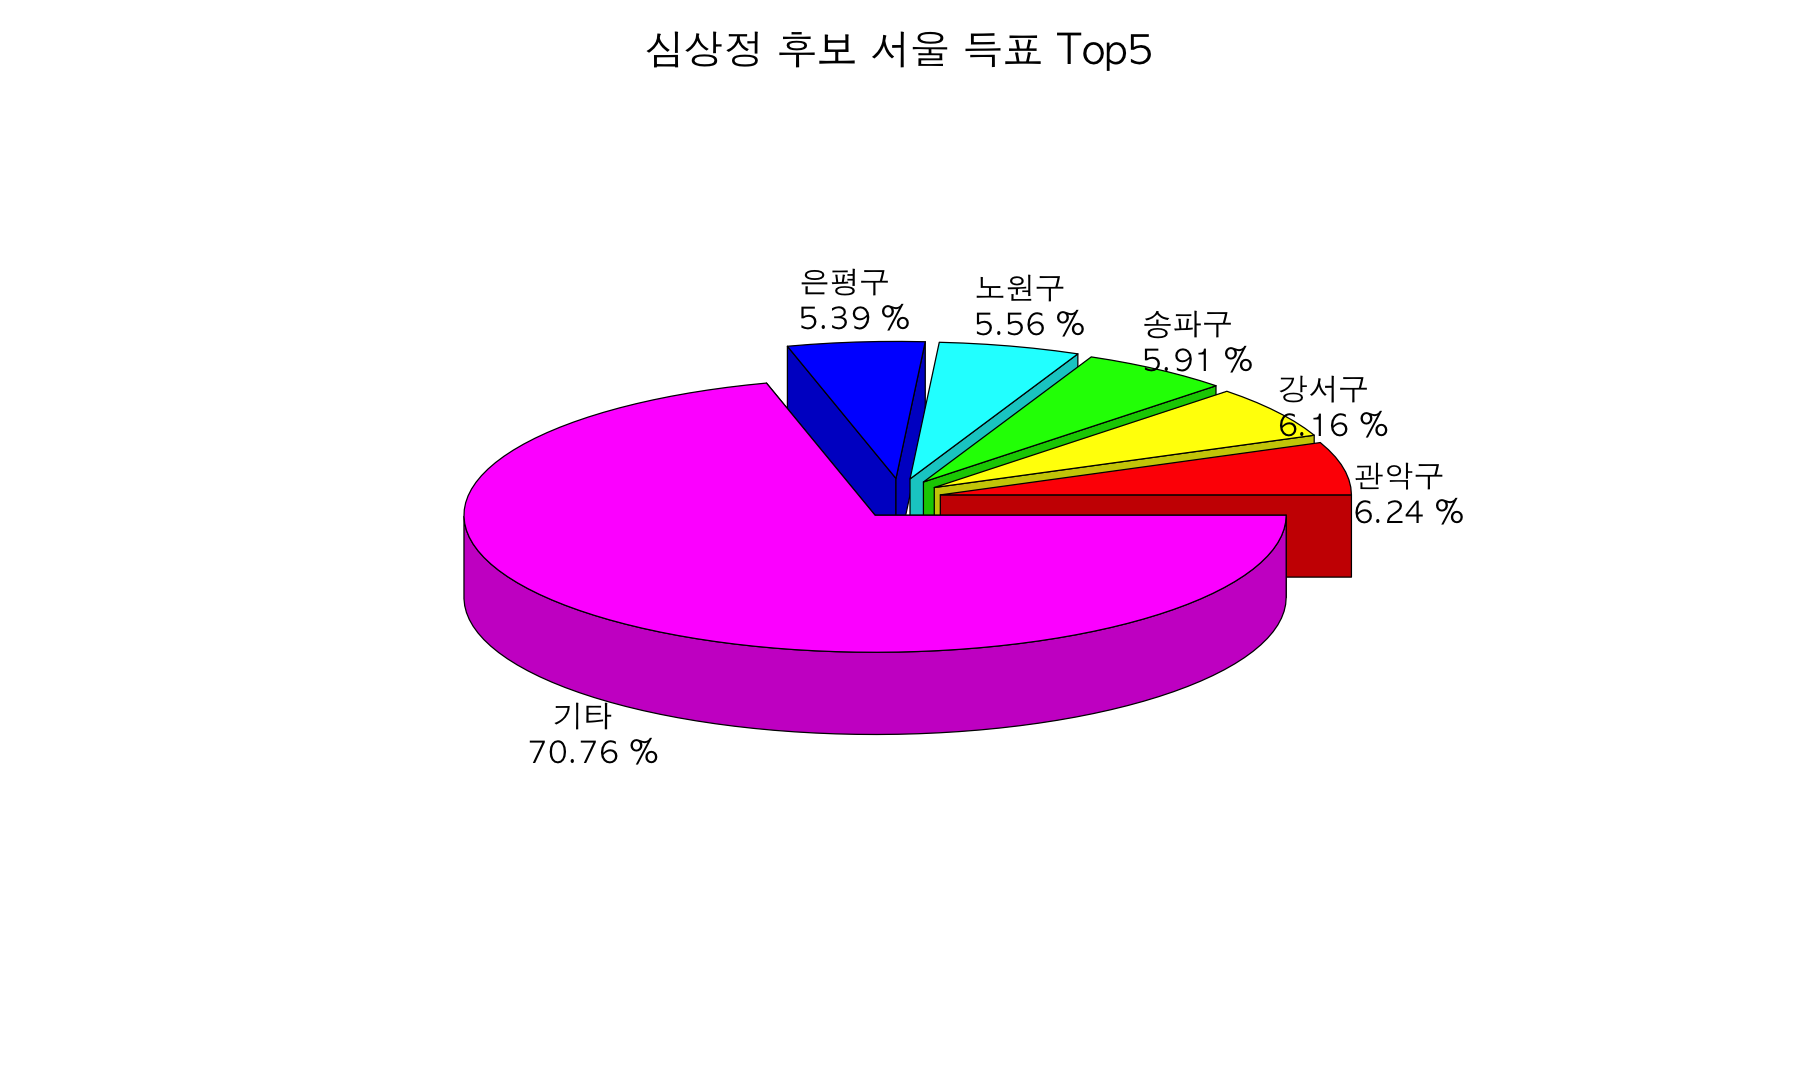

In [119]:
# 서울 특별시만 남기기 # 내림차순 정렬
elec_seoul <- arrange(subset(election, 광역시도 == "서울특별시")[,c(2,7)], desc(심상정))

# ratio 계산
elec_seoul_yoon_ratio <- round(elec_seoul$`심상정` / sum(elec_seoul$`심상정`) * 100, 2)
elec_seoul_yoon_ratio

# top5를 제외하고 sum
elec_seoul_yoon_ratio <- c(elec_seoul_yoon_ratio[1:5], sum(elec_seoul_yoon_ratio[6:length(elec_seoul_yoon_ratio)]))
elec_seoul_yoon_ratio

# 시군구 이름 정리
elec_seoul_name <- c(elec_seoul$`시군구`[1:5], "기타")
elec_seoul_label <- paste(elec_seoul_name, "\n", elec_seoul_yoon_ratio, "%")


par(bg = "white", family = "AppleGothic")
pie3D(
    elec_seoul_yoon_ratio,
    labels = elec_seoul_label,
    explode = .1,
    main = "심상정 후보 서울 득표 Top5",
    cex.main = 2
)

[1] 6.45 6.13 5.75 5.75 5.48 4.85 4.73 4.71 4.52 4.43 4.17 4.00 3.95 3.73 3.67
[16] 3.63 3.62 3.51 3.42 3.01 2.87 2.72 2.04 1.57 1.30

[1]  6.45  6.13  5.75  5.75  5.48 70.45

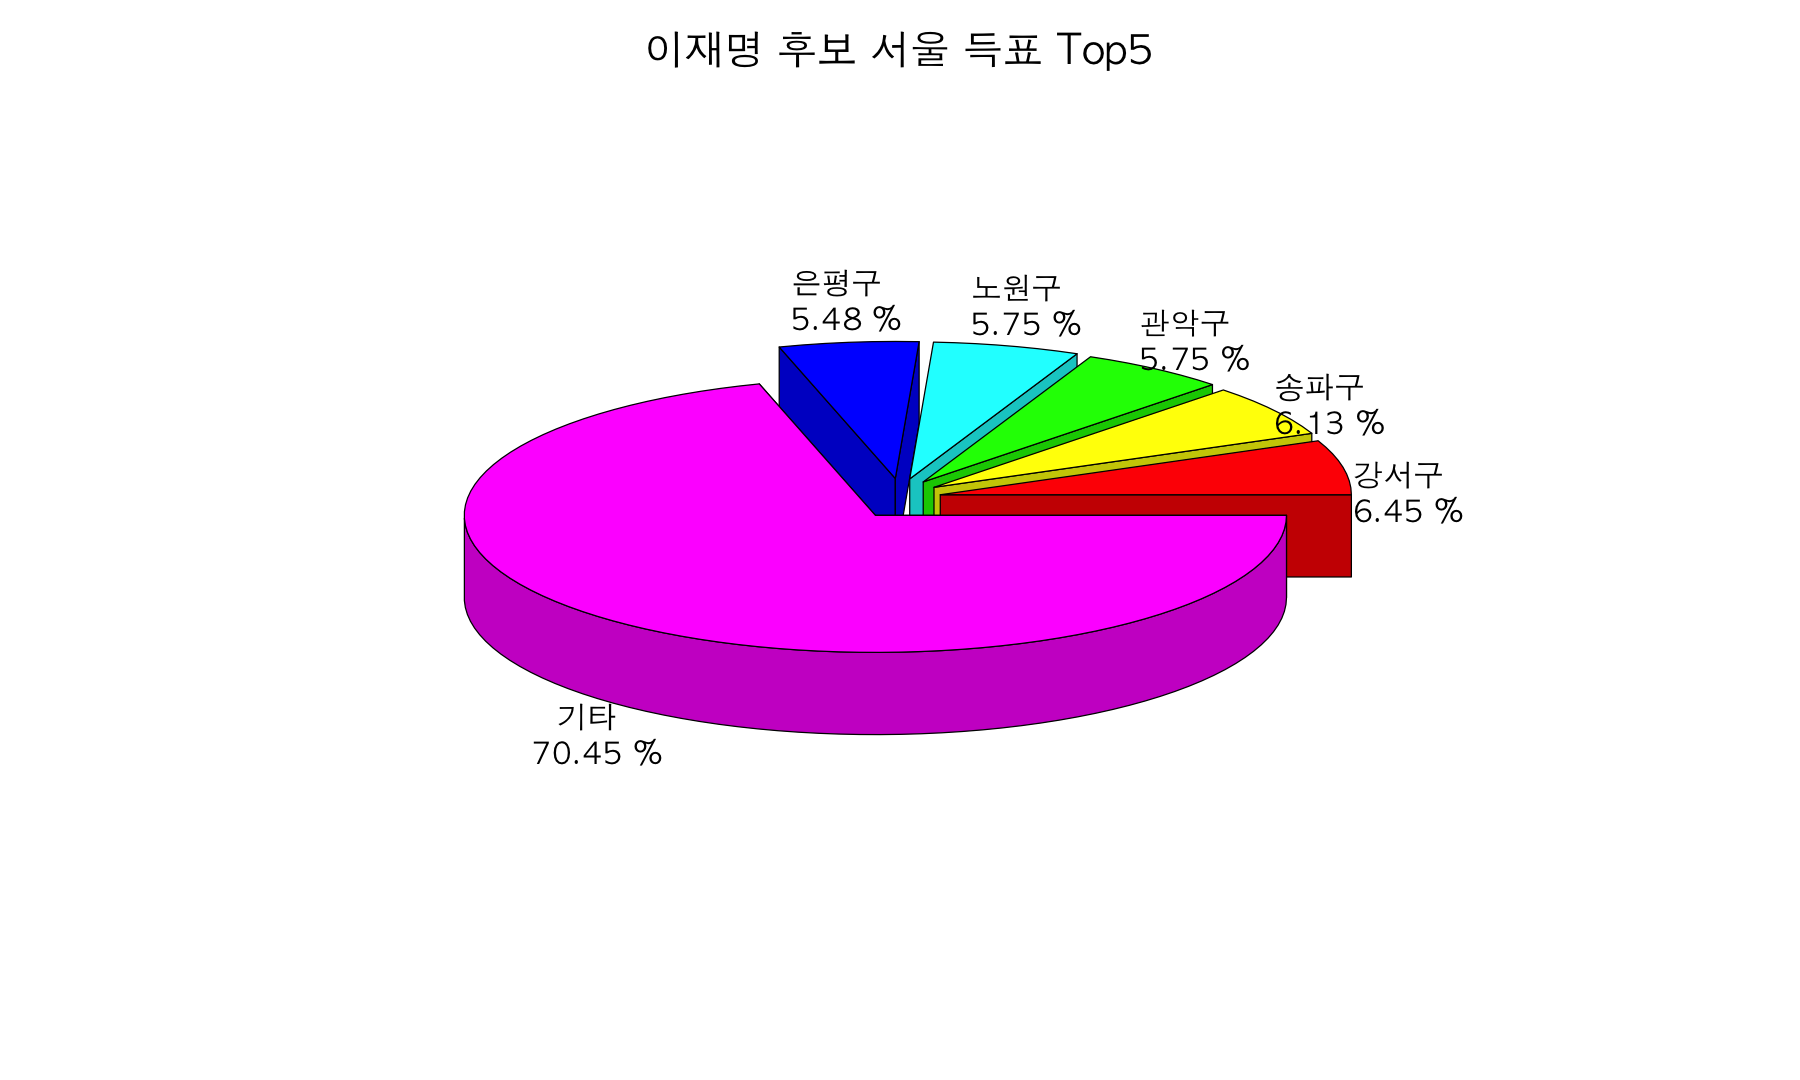

In [120]:
# 서울 특별시만 남기기 # 내림차순 정렬
elec_seoul <- arrange(subset(election, 광역시도 == "서울특별시")[,c(2,5)], desc(이재명))

# ratio 계산
elec_seoul_yoon_ratio <- round(elec_seoul$`이재명` / sum(elec_seoul$`이재명`) * 100, 2)
elec_seoul_yoon_ratio

# top5를 제외하고 sum
elec_seoul_yoon_ratio <- c(elec_seoul_yoon_ratio[1:5], sum(elec_seoul_yoon_ratio[6:length(elec_seoul_yoon_ratio)]))
elec_seoul_yoon_ratio

# 시군구 이름 정리
elec_seoul_name <- c(elec_seoul$`시군구`[1:5], "기타")
elec_seoul_label <- paste(elec_seoul_name, "\n", elec_seoul_yoon_ratio, "%")


par(bg = "white", family = "AppleGothic")
pie3D(
    elec_seoul_yoon_ratio,
    labels = elec_seoul_label,
    explode = .1,
    main = "이재명 후보 서울 득표 Top5",
    cex.main = 2
)

In [128]:
# 서울특별시 데이터만 발췌
# 발췌된 데이터중 시군구, 윤석열 칼럼만
# 상기의 데이터중 1~5등의 시군구 이름과 윤석열 득표수 + 기타(1~5등 제외 특표수 합계

# subset(election, 광역시도 == "서울특별시")
# boolean 인덱싱
election_seoul_yoon <- arrange(election[election$`광역시도` == "서울특별시", ], desc(윤석열))[,c(2,6)] # boolean Indexing 검색
head(election_seoul)

,시군구,윤석열
,<chr>,<int>
1,송파구,255166
2,강남구,235897
3,강서구,181510
4,서초구,179472
5,노원구,163340
6,강동구,160593


In [138]:
# Ratio
election_seoul_yoon_ratio <- round(c(election_seoul_yoon[1:5,2], sum(election_seoul_yoon[-c(1:5), 2])) / sum(election_seoul_yoon$`윤석열`) * 100, 2)

election_seoul_yoon_ratio

[1]  7.84  7.25  5.58  5.51  5.02 68.81

In [146]:
# label
election_seoul_yoon_label <- paste(c(election_seoul_yoon$`시군구`[1:5], "기타"), "\n", election_seoul_yoon_ratio, "%")
election_seoul_yoon_label

[1] "송파구 \n 7.84 %" "강남구 \n 7.25 %" "강서구 \n 5.58 %" "서초구 \n 5.51 %"
[5] "노원구 \n 5.02 %" "기타 \n 68.81 %"

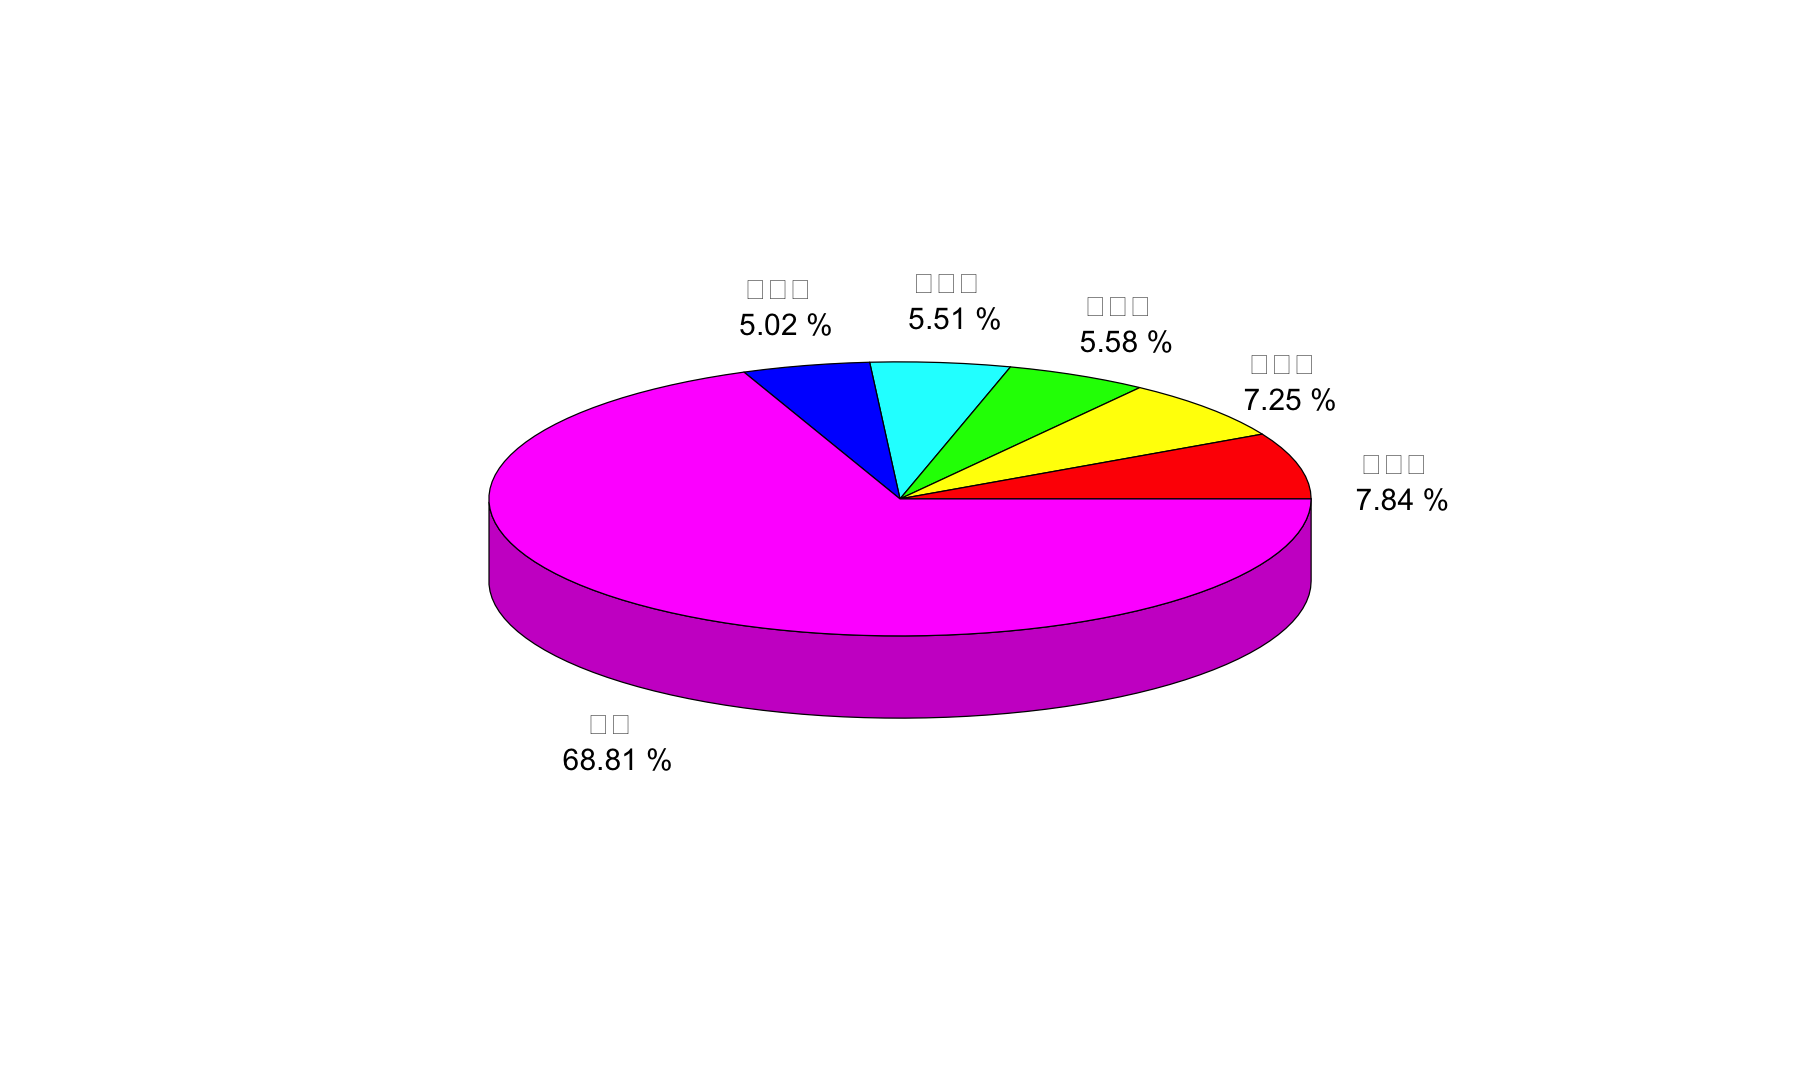

In [148]:
pie3D(
    election_seoul_yoon_ratio,
    labels = election_seoul_yoon_label
)

### 대선주자 출생지별 득표율 분석
- 윤석열 후보의 출생지는 서울특별시 성북구
- 국민의힘(red), 민주당(sky blue), 정의당(yellow), 기타(gray)

In [149]:
head(election)

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,서울특별시,종로구,129968,100629,46130,49172,3115,98417,97.80183
2,서울특별시,중구,111448,84998,38244,42906,2310,83460,98.19055
3,서울특별시,용산구,199077,152068,60063,85047,4374,149484,98.30076
4,서울특별시,성동구,252087,197240,84411,103880,5365,193656,98.18292
5,서울특별시,광진구,303582,235471,109922,113733,7072,230727,97.98531
6,서울특별시,동대문구,300928,232106,108171,112890,6416,227477,98.00565


In [152]:
election["종로구",]

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [245]:
election_sungbuk <- election[election$`시군구` == "성북구", ][,4:8]
election_sungbuk$electionSum <- election_sungbuk$`투표수` - election_sungbuk$electionSum
rownames(election_sungbuk) <- c("투표수")
election_sungbuk


,투표수,이재명,윤석열,심상정,electionSum
,<int>,<int>,<int>,<int>,<int>
투표수,292187,142702,135044,8952,5489


In [246]:
sungbuk_t <- t(election_sungbuk[,2:5])

rownames(sungbuk_t) <- c(rownames(sungbuk_t)[1:3], "기타")
sungbuk_t <- as.data.frame(sungbuk_t)

sungbuk_t <- arrange(sungbuk_t, desc(투표수))
sungbuk_t

sungbuk_ratio <- round(sungbuk_t$투표수 / sum(sungbuk_t$`투표수`) * 100, 2)
sungbuk_ratio


,투표수
,<int>
이재명,142702
윤석열,135044
심상정,8952
기타,5489


[1] 48.84 46.22  3.06  1.88

In [235]:
sungbuk_name <- rownames(sungbuk_t)
sungbuk_name

[1] "이재명" "윤석열" "심상정" "기타"

In [239]:
sungbuk_label <- paste(sungbuk_name, "\n", sungbuk_ratio, "%")
sungbuk_label

[1] "이재명 \n 48.84 %" "윤석열 \n 46.22 %" "심상정 \n 3.06 %" 
[4] "기타 \n 1.88 %"

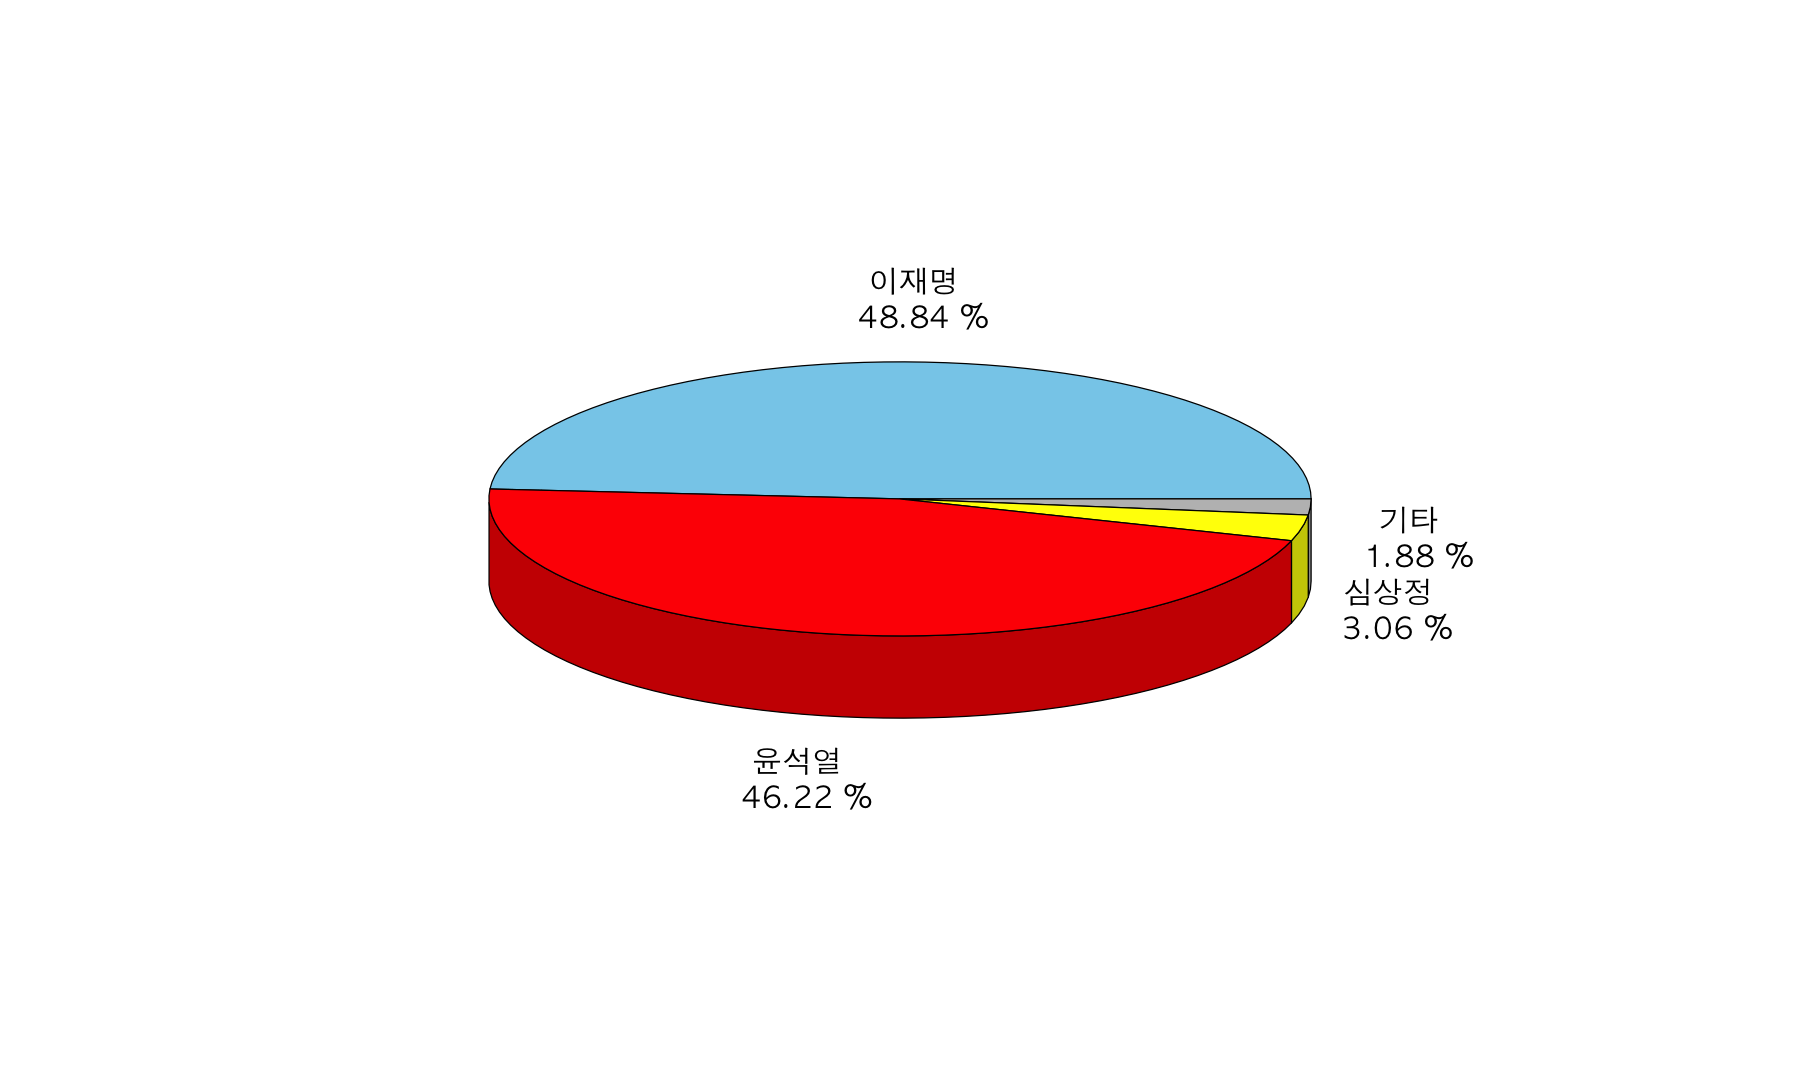

In [185]:
par(bg = "white", family = "AppleGothic")
pie3D(
    sungbuk_ratio,
    labels = sungbuk_label,
    col = c("sky blue", "red", "yellow", "gray")
)

In [370]:
# head(election)
top4_name <- arrange(aggregate(투표수 ~ 광역시도, election, sum), desc(투표수))[1:4,]

lee <- aggregate(이재명 ~ 광역시도, election, sum)
yoon <- aggregate(윤석열 ~ 광역시도, election, sum)
sim <- aggregate(심상정 ~ 광역시도, election, sum)

top4_name <- merge(x = top4_name, y = lee, by.x = "광역시도", by.y = "광역시도")
top4_name <- merge(x = top4_name, y = yoon, by.x = "광역시도", by.y = "광역시도")
top4_name <- merge(x = top4_name, y = sim, by.x = "광역시도", by.y = "광역시도")

top_4 <- arrange(top4_name, desc(투표수))
bar_chart <- as.vector(t(top_4[,-2])[-1,])
bar_data <- matrix(
    as.numeric(bar_chart),
    3,
    4
)

rownames(bar_data) <- colnames(top_4)[3:5]

bar_data


이재명,4297931,2944981,831896,794130
윤석열,3859666,3255747,1270072,1237346
심상정,201113,180324,47541,52591


In [390]:
# aggregate(cbind(투표수, 이재명, 윤석열, 심상정) ~ 광역시도, election, sum)
## aggregate 여러개로 묶기
arrange(aggregate(cbind(투표수, 이재명, 윤석열, 심상정) ~ 광역시도, election, sum), desc(투표수))

bar_data <- t(arrange(aggregate(cbind(투표수, 이재명, 윤석열, 심상정) ~ 광역시도, election, sum), desc(투표수))[1:4, 3:5])

colnames(bar_data) <- arrange(aggregate(cbind(투표수, 이재명, 윤석열, 심상정) ~ 광역시도, election, sum), desc(투표수))[1:4,]$광역시도

bar_data

광역시도,투표수,이재명,윤석열,심상정
<chr>,<int>,<int>,<int>,<int>
경기도,8518854,4297931,3859666,201113
서울특별시,6501831,2944981,3255747,180324
부산광역시,2200224,831896,1270072,47541
경상남도,2146882,794130,1237346,52591
인천광역시,1883504,913320,878560,51852
경상북도,1774284,418371,1278922,33123
대구광역시,1611512,345045,1199888,31131
충청남도,1324660,589991,670283,31789
전라남도,1282168,1094872,145549,16279


,경기도,서울특별시,부산광역시,경상남도
이재명,4297931,2944981,831896,794130
윤석열,3859666,3255747,1270072,1237346
심상정,201113,180324,47541,52591


In [289]:
## 지수 없애기
options(scipen = 100)

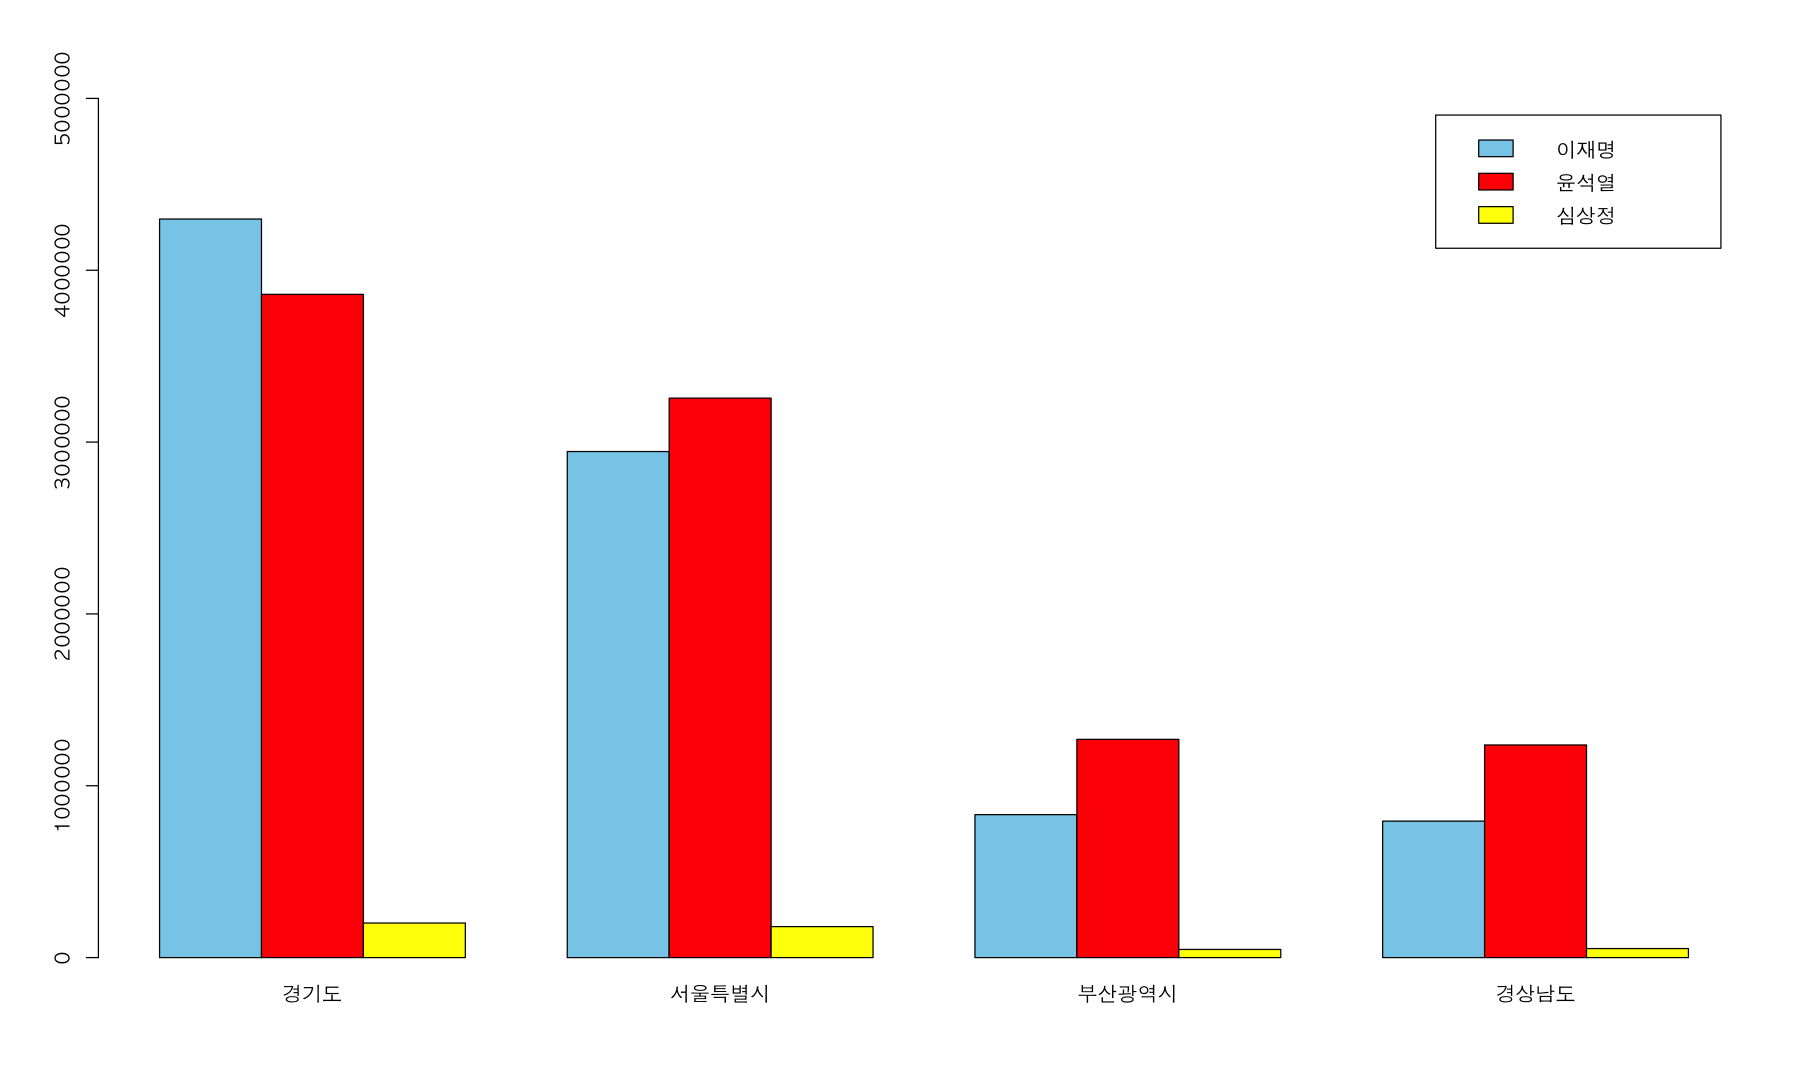

In [388]:

par(bg = "white", family = "AppleGothic")
barplot(
    bar_data,
    beside = T,
    ylim = c(0, 5000000),
    legend = T,
    # name = top_4$`광역시도`,
    col = c("sky blue", "red", "yellow")
)

In [437]:
local5 <- subset(arrange(election, desc(투표수))[1:5,], select = c("광역시도", "시군구", "투표수","이재명", "윤석열", "심상정"))
paste(local5$광역시도, local5$시군구)

head(elec_top5)

elec_top5 <- head(arrange(election, desc(투표수)), 5)
elec_top5_matrix <- t(elec_top5[, 5:7])
colnames(elec_top5_matrix) <- paste(elec_top5$광역시도, elec_top5$시군구)
elec_top5_matrix[,1]

[1] "경기도 화성시"     "경기도 부천시"     "경기도 남양주시"  
[4] "서울특별시 송파구" "서울특별시 강서구"

,광역시도,시군구,선거인수,투표수,이재명,윤석열,심상정,electionSum,electionRatio
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,경기도,화성시,703896,542027,283324,236055,12955,532334,98.21171
2,경기도,부천시,699678,532995,285227,224331,13249,522807,98.08854
3,경기도,남양주시,608146,460518,239179,203075,10089,452343,98.22483
4,서울특별시,송파구,565840,453536,180490,255166,10652,446308,98.40630
5,서울특별시,강서구,504185,390247,190000,181510,11100,382610,98.04303


[1] 2336402

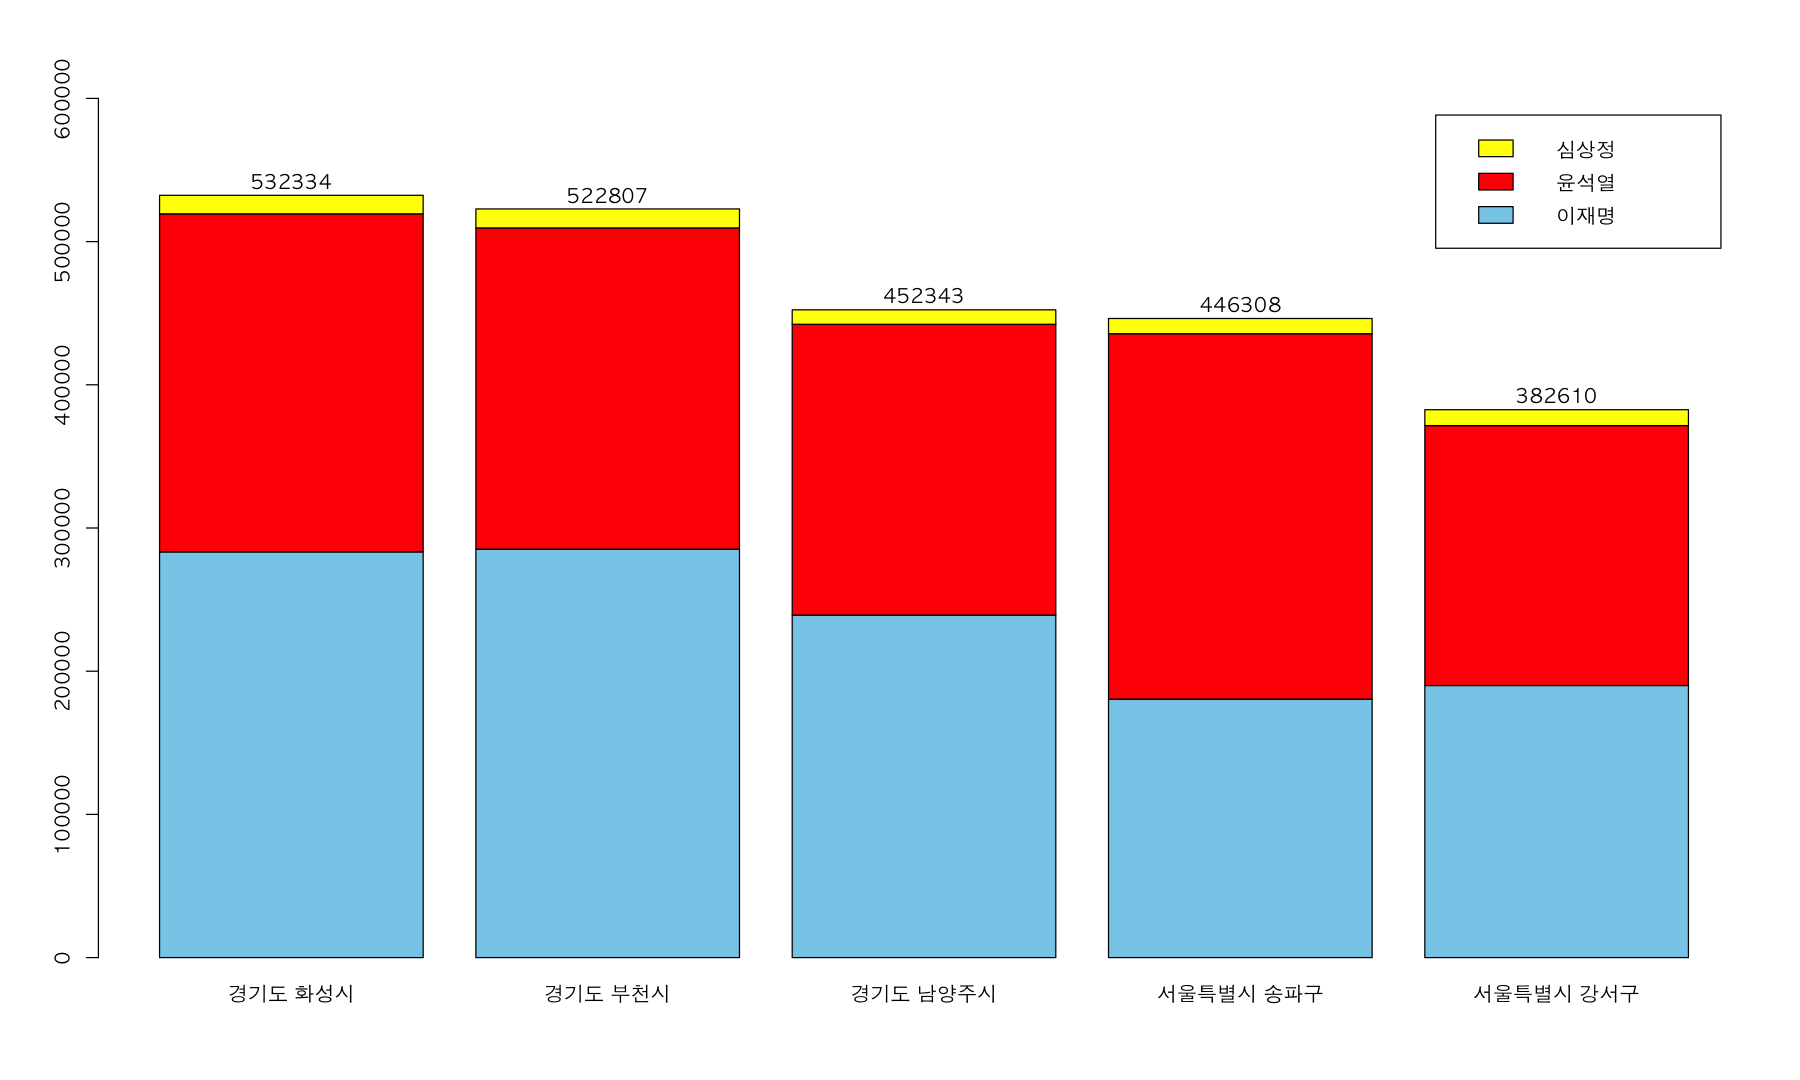

In [441]:

par(bg = "white", family = "AppleGothic")
barplot(
    elec_top5_matrix,
    ylim = c(0, 600000),
    legend = T,
    col = c("sky blue", "red", "yellow")
)

pos <- 0.7
for (i in 1:5){
    text(pos, sum(elec_top5_matrix[,i])+10000, sum(elec_top5_matrix[,i]))
    pos = pos + 1.2
}
# text(0.7, 540000, "This is a 샘플")
# text(1.9, 550000, "This is a 샘플")
# text(3.1, 550000, "This is a 샘플")
# text(4.3, 550000, "This is a 샘플")
# text(5.5, 550000, "This is a 샘플")

이재명 
283324

[1] 532334

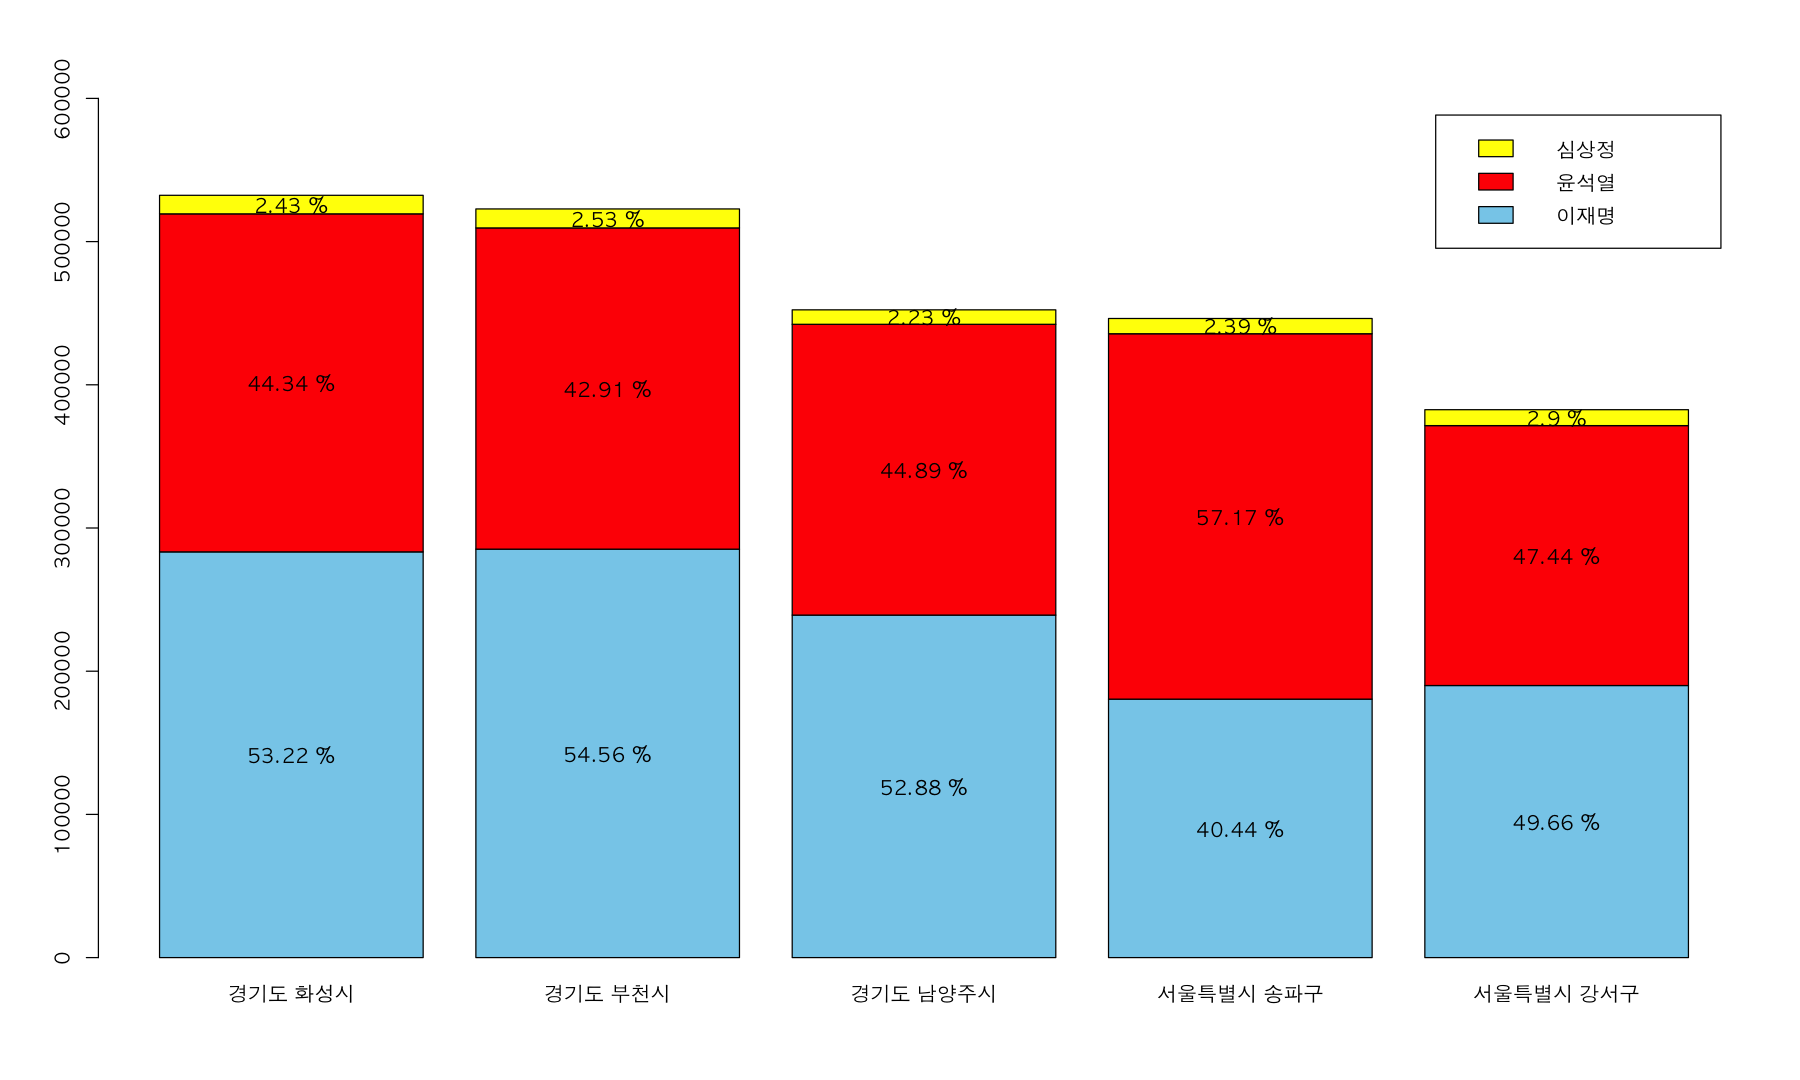

In [459]:
par(bg = "white", family = "AppleGothic")
barplot(
    elec_top5_matrix,
    ylim = c(0, 600000),
    legend = T,
    col = c("sky blue", "red", "yellow")
)
elec_top5_matrix[,1][1]
sum(elec_top5_matrix[,1])
# elec_top5_matrix[,i][j]
for (i in 1:5){
    sum <- sum(elec_top5_matrix[,i])
    add <- 0
    for(j in 1:3){
        text(0.7 + (1.2 * (i-1)), add + (elec_top5_matrix[,i][j]/2), paste(round(elec_top5_matrix[,i][j]/sum * 100,2), "%"))
        add = add + elec_top5_matrix[,i][j]
    }
}